# Question 1
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

#  Minitab File : Cutlets.mtw
We are going to conduct a 2 tailed t-Test on 2 Independent samples with Numerical Data.
We need to check whether the mean of both samples are different and
Is there any significance difference between the two samples?
# Step 1
Make two Hypothesis one contradicting to other
Null Hypothesis is want we want to prove
Null Hypothesis: miu1 = miu2
Alternative Hypthosis: miu1 <> miu2
# Step 2
Decide a cut-off value
Significance 5%
alpha = 0.05
As it is a two-tailed test
alpha/2 = 0.025
# Step 3
Collect evidence

In [2]:
# Importing Libraries
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns
ImageGrab.grabclipboard()

In [3]:
# Importing Files
cutlets = pd.read_csv('E:\Assignment\Cutlets.csv')
cutlets.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
#Applying Descriptive Statistics
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
# Checking for Null Values
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [7]:
#Checking for Duplicate Values
cutlets[cutlets.duplicated()]

,Unit A,Unit B


In [8]:
#checking Data Type
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


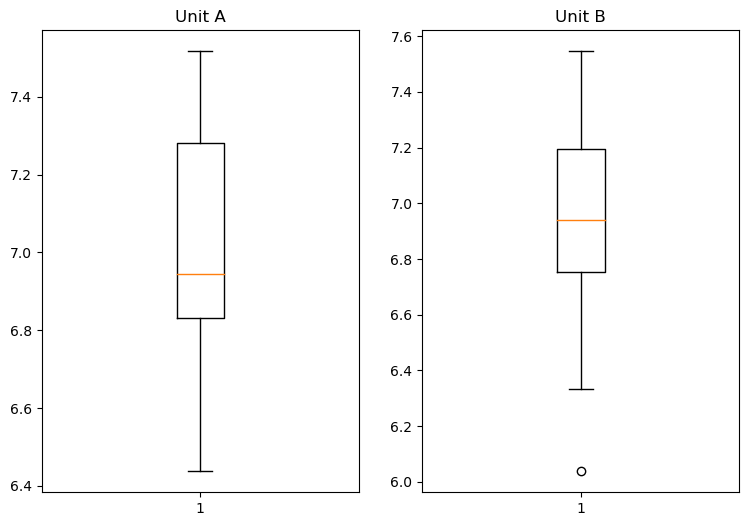

In [9]:
#Plotting the data
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

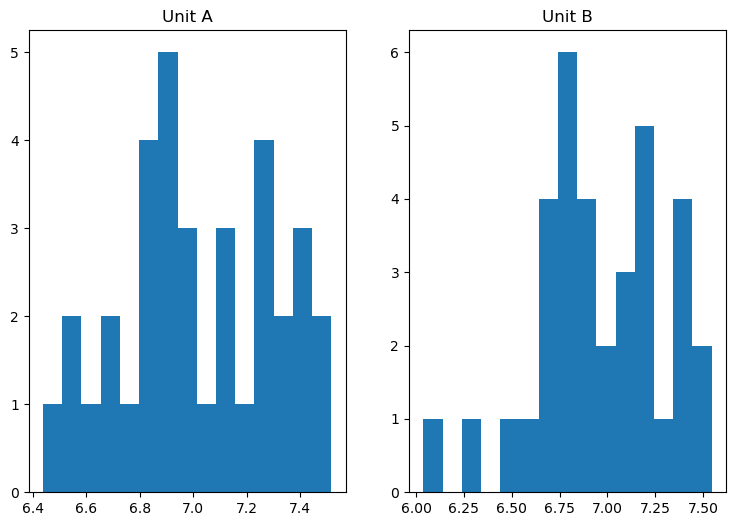

In [11]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutlets['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

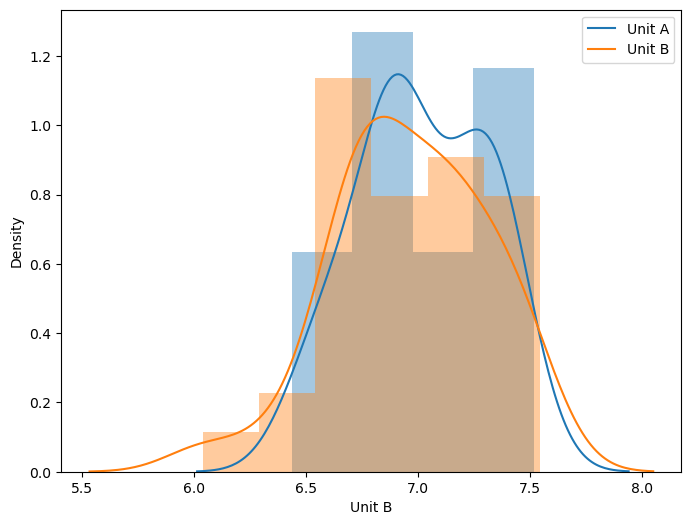

In [12]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'], kde = True)
sns.distplot(cutlets['Unit B'],hist = True)
plt.legend(labels)

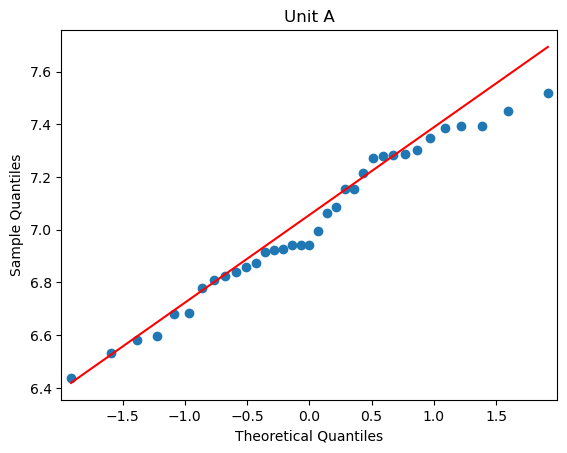

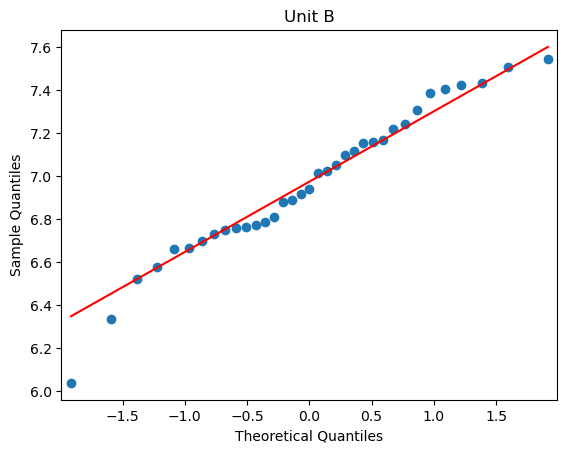

In [13]:
#Plotting Q-Q plot to check whether the distribution follows normal distribution or not
sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

In [14]:
#Compare Evidences with Hypothesis using t-statistics
statistic , p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)
print('statistic=',statistic)

p_value= 0.4722394724599501
statistic= 0.7228688704678063


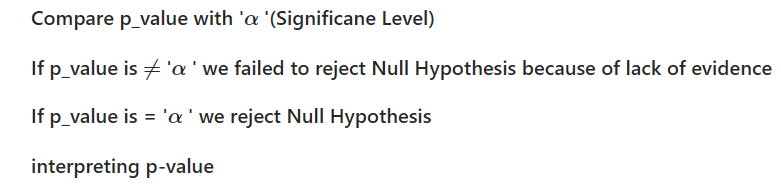

In [16]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

# Question 2
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 
 
# Minitab File: LabTAT.mtw
We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data
We need to check whether the mean of any of these samples are different or the same?
# Step 1
Make two Hypothesis one contradicting to other
Null Hypothesis is want we want to prove
Null Hypothesis: miu1 = miu2 = miu3 = miu4 
Alternative Hypthosis: Atleast One of them is Differente
# Step 2
Decide a cut-off value
Significance 5%
alpha = 0.05
# Step 3
Collect evidence

In [46]:
# importing Files
LabTAT = pd.read_csv("E:\Assignment\LabTAT.csv")
LabTAT.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [19]:
# Applying Descriptive Statistics
LabTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [47]:
#Checking for Null Values
LabTAT.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [48]:
#checking for Duplicate Values
LabTAT[LabTAT.duplicated()].shape

(0, 4)

In [22]:
LabTAT[LabTAT.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [49]:
#checking Data Type
LabTAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


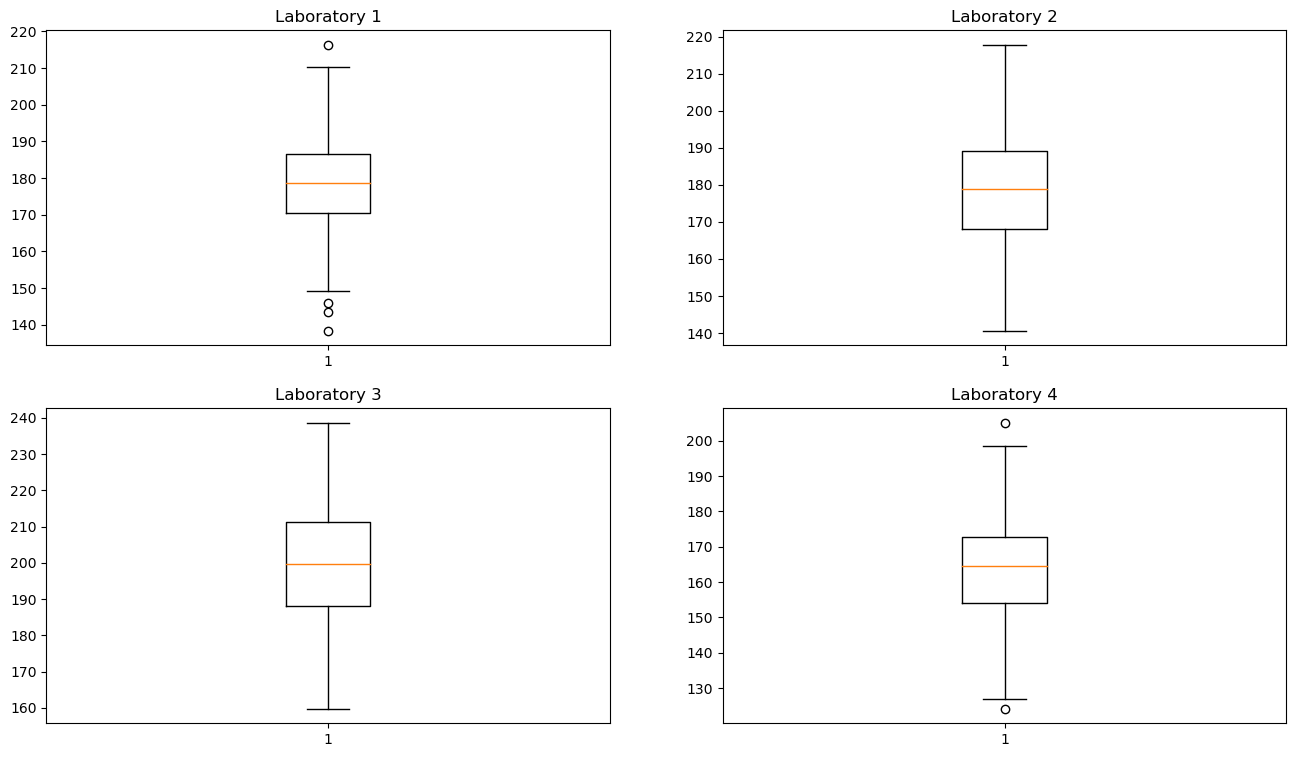

In [50]:
# Plotting the data
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(LabTAT['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(LabTAT['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(LabTAT['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(LabTAT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

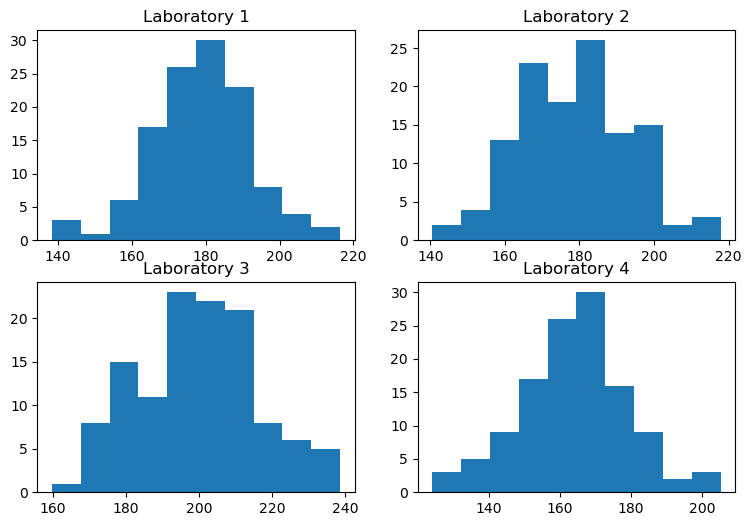

In [26]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(LabTAT['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(LabTAT['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(LabTAT['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(LabTAT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

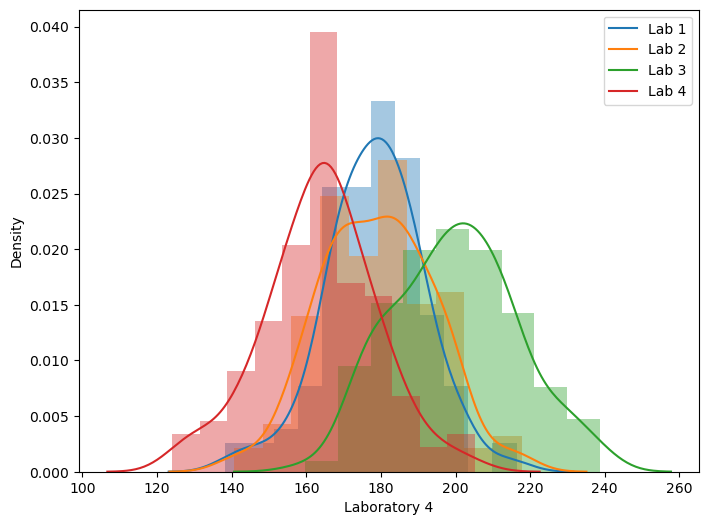

In [51]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(LabTAT['Laboratory 1'], kde = True)
sns.distplot(LabTAT['Laboratory 2'],hist = True)
sns.distplot(LabTAT['Laboratory 3'],hist = True)
sns.distplot(LabTAT['Laboratory 4'],hist = True)
plt.legend(labels)

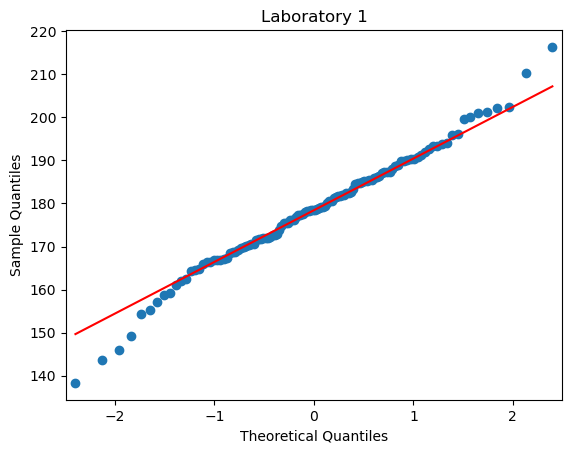

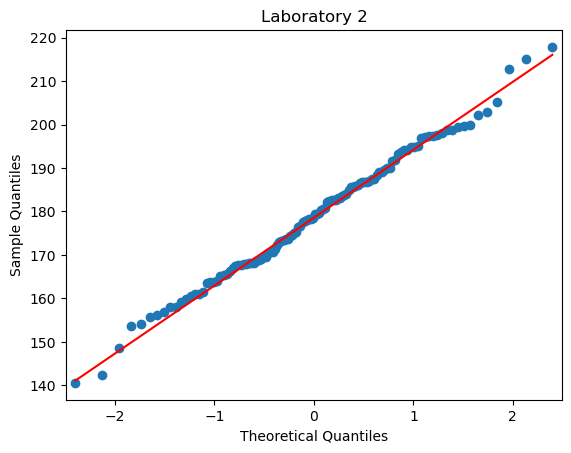

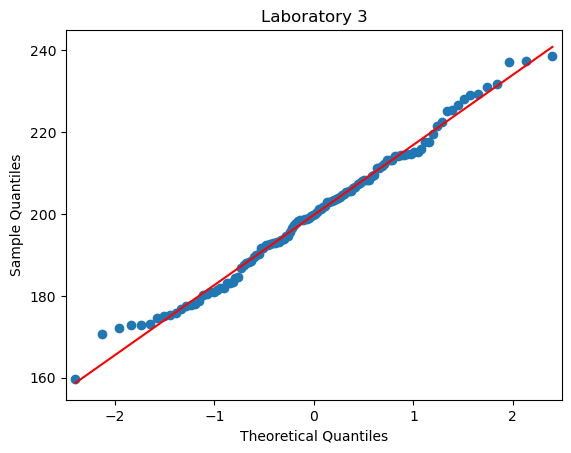

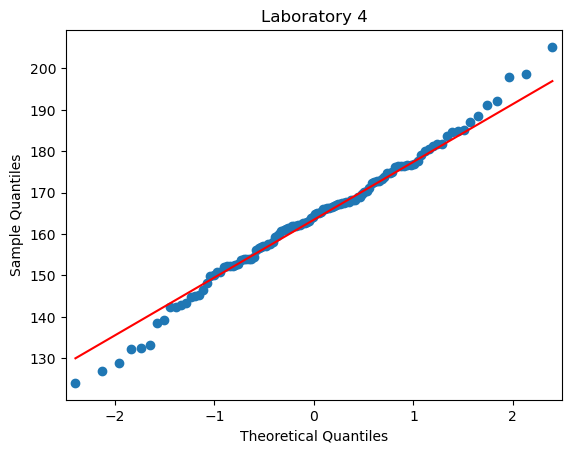

In [28]:
sm.qqplot(LabTAT['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(LabTAT['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(LabTAT['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(LabTAT['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

Compare Evidences with Hypothesis using t-statictic

In [52]:
test_statistic , p_value = stats.f_oneway(LabTAT.iloc[:,0],LabTAT.iloc[:,1],LabTAT.iloc[:,2],LabTAT.iloc[:,3])
print('p_value =',p_value)
print('test_statistic =',test_statistic)

p_value = 2.1156708949992414e-57
test_statistic = 118.70421654401437


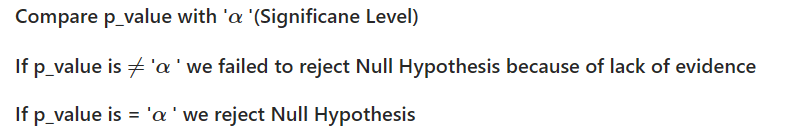

In [55]:
alpha = 0.05
print('p_value =', p_value)
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

p_value = 2.1156708949992414e-57
Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


Hence, We reject Null Hypothesis. 

# Question 3
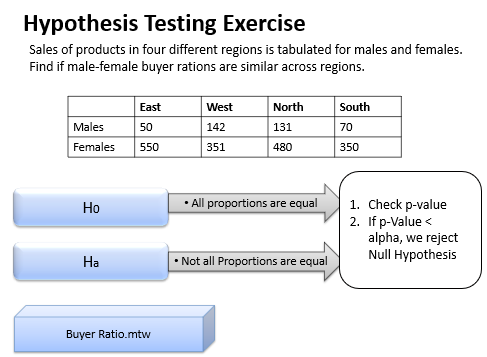

We are going to conduct a Test of Independence using Chi-Square 
 test with Contingency table
We need to check whether the proportion of any of these samples are different or the same?
# Step 1
Make two Hypothesis one contradicting to other
Null Hypothesis is want we want to prove
Null Hypothesis: There is no association or dependency between the gender based buyer rations across regions
Alternative Hypthosis: There is a significant association or dependency between the gender based buyer rations across regions
# Step 2
Decide a cut-off value
Significance 5%
alpha = 0.05
As it is a one-tailed test
alpha = 1-0.95 = 0.05
# Step 3
Collect evidence

In [34]:
# Importing Files
buyer = pd.read_csv("E:\Assignment\BuyerRatio.csv")
buyer.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [35]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

Applying Chi-Square X2 contingency table to convert observed value into expected value

In [41]:
stat, p, dof, exp = stats.chi2_contingency(table) 
print("Chi-square statistic:", stat)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", exp)

Chi-square statistic: 1.595945538661058
P-value: 0.6603094907091882
Degrees of freedom: 3
Expected frequencies: [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [42]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [44]:
#Comparing Evidence with Hypothesis
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


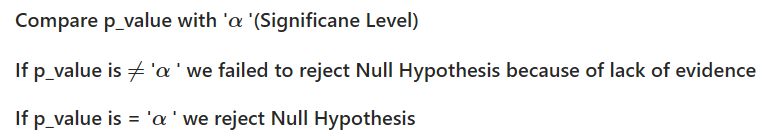

In [45]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

# Question 4
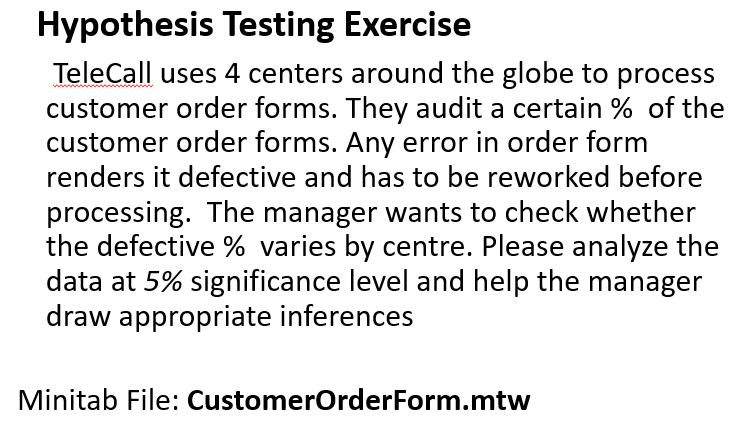

We are going to conduct a Test of Independence using Chi-Square 
 test with Contingency table
We need to check whether the mean of any of these samples are different or the same?
# Step 1
Make two Hypothesis one contradicting to other
Null Hypothesis is want we want to prove
Null Hypothesis: miu1 = miu2 = miu3 = miu4
Alternative Hypthosis: Atleast One of them is Differente
# Step 2
Decide a cut-off value
Significance 5%
alpha = 0.05
# Step 3
Collect evidence

In [56]:
#importing Files
centers = pd.read_csv("E:\Assignment\Costomer+OrderForm.csv")
centers.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [57]:
# Applying Descriptive Statistics
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [58]:
# Checking for Null Values
centers.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [60]:
# Checking the data type
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [61]:
#Checking value counts in data
print(centers['Phillippines'].value_counts(),'\n',centers['Indonesia'].value_counts(),'\n',centers['Malta'].value_counts(),'\n',centers['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [62]:
# create Contingency table
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [63]:
# Calculating Expected Values for Observed data
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [65]:
#Defining Expected values and observed values
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [66]:
#Compare Evidences with Hypothesis using t-statictic
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


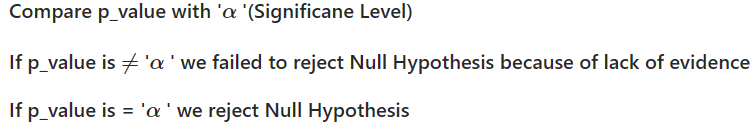


In [67]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


We fail to reject Null Hypothesis because of lack of evidence.